In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')  

In [ ]:
data = df.copy()

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({5:4,0:4,6:0})

In [ ]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})

In [ ]:
df[["SEX", "DEF_PAY_NMO"]].groupby(['SEX']).size()

SEX
1    11888
2    18112
dtype: int64

In [ ]:
df.groupby(['SEX', 'DEF_PAY_NMO']).size()

SEX  DEF_PAY_NMO
1    0               9015
     1               2873
2    0              14349
     1               3763
dtype: int64

In [ ]:
gender = df.groupby(['SEX', 'DEF_PAY_NMO']).size().unstack(1)

In [ ]:
gender

DEF_PAY_NMO,0,1
SEX,,
1,9015,2873
2,14349,3763


In [ ]:
df.groupby('DEF_PAY_NMO')['SEX'].mean()

DEF_PAY_NMO
0    1.614150
1    1.567058
Name: SEX, dtype: float64

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [ ]:
df.drop(columns = 'ID', axis = 1, inplace = True)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [ ]:
df['avg_default'] = df.iloc[:, 5:11].sum(axis=1) / 6 # average default history

In [ ]:
df['avg_bill_amt'] = df.iloc[:, 11:17].sum(axis=1) / 6 # average bill amount
df['avg_pay_amt'] = df.iloc[:, 18:24].sum(axis=1) / 6 # average payment amount

In [ ]:
df.groupby('DEF_PAY_NMO')['avg_default'].mean()    # average avg_default of people who do not default and default

DEF_PAY_NMO
0   -0.330023
1    0.337176
Name: avg_default, dtype: float64

In [ ]:
df.groupby('DEF_PAY_NMO')['avg_bill_amt'].mean()  # average avg_bill_amt of people who do not default and default

DEF_PAY_NMO
0    45404.817975
1    43470.492591
Name: avg_bill_amt, dtype: float64

In [ ]:
df.groupby('DEF_PAY_NMO')['avg_pay_amt'].mean()  # average avg_pay_amt of people who do not default and defaul

DEF_PAY_NMO
0    4777.013882
1    2762.208258
Name: avg_pay_amt, dtype: float64

In [ ]:
df.groupby('DEF_PAY_NMO')['LIMIT_BAL'].mean()   # average limit balance  of people who do not default and default

DEF_PAY_NMO
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

In [ ]:
df['pay_bill_rat'] = df['avg_pay_amt']/df['avg_bill_amt'] 

In [ ]:
df['pay_bill_rat'].isnull().sum()

499

In [ ]:
import numpy as np

In [ ]:
print(df[df['pay_bill_rat']==np.inf].shape[0]) 

371


In [ ]:
df[df['pay_bill_rat']==np.inf].index

df = df.drop(df[df['pay_bill_rat']==np.inf].index)

In [ ]:
df.shape

(29629, 28)

In [ ]:
df['bill_bal_rat'] = df['avg_bill_amt'] / df['LIMIT_BAL'] # average bill amount to credit limit ratio
df['pay_bal_rat'] = df['avg_pay_amt'] / df['LIMIT_BAL'] # average payment amount to credit limit ratio

In [ ]:
df[df["avg_bill_amt"] != 0].groupby("DEF_PAY_NMO")["pay_bill_rat"].mean()   # defaulters have loew pay_bill_ratio

DEF_PAY_NMO
0    0.372585
1    0.220310
Name: pay_bill_rat, dtype: float64

In [ ]:
df.groupby('DEF_PAY_NMO')['bill_bal_rat'].mean()         # defaulters have high bill_bal_rat

DEF_PAY_NMO
0    0.352205
1    0.471837
Name: bill_bal_rat, dtype: float64

In [ ]:
zero_bal_labels = ['zero_bal' + str(i) for i in range(1,7)]
bill_labels = ['bill_amt' + str(i) for i in range(1,7)]

In [ ]:
zero_bal_labels

['zero_bal1', 'zero_bal2', 'zero_bal3', 'zero_bal4', 'zero_bal5', 'zero_bal6']

In [ ]:
usage_labels = ['usage' + str(i) for i in range(1,7)]
pay_labels = ['PAY_' + str(i) for i in range(1,7)]

# usagei denotes the portion of credit limit paid in month i
for i in range(0,6):
    df[usage_labels[i]] = df[pay_labels[i]] / df['LIMIT_BAL']

zero_bal_labels = ['zero_bal' + str(i) for i in range(1,7)]
bill_labels = ['BILL_AMT' + str(i) for i in range(1,7)]

# zero_bali denotes the ratio of outstanding bill to credit limit
for i in range(0,6):
    df[zero_bal_labels[i]] = (df[bill_labels[i]] - df[pay_labels[i]]) / df['LIMIT_BAL']

In [ ]:
df.columns.shape

(42,)

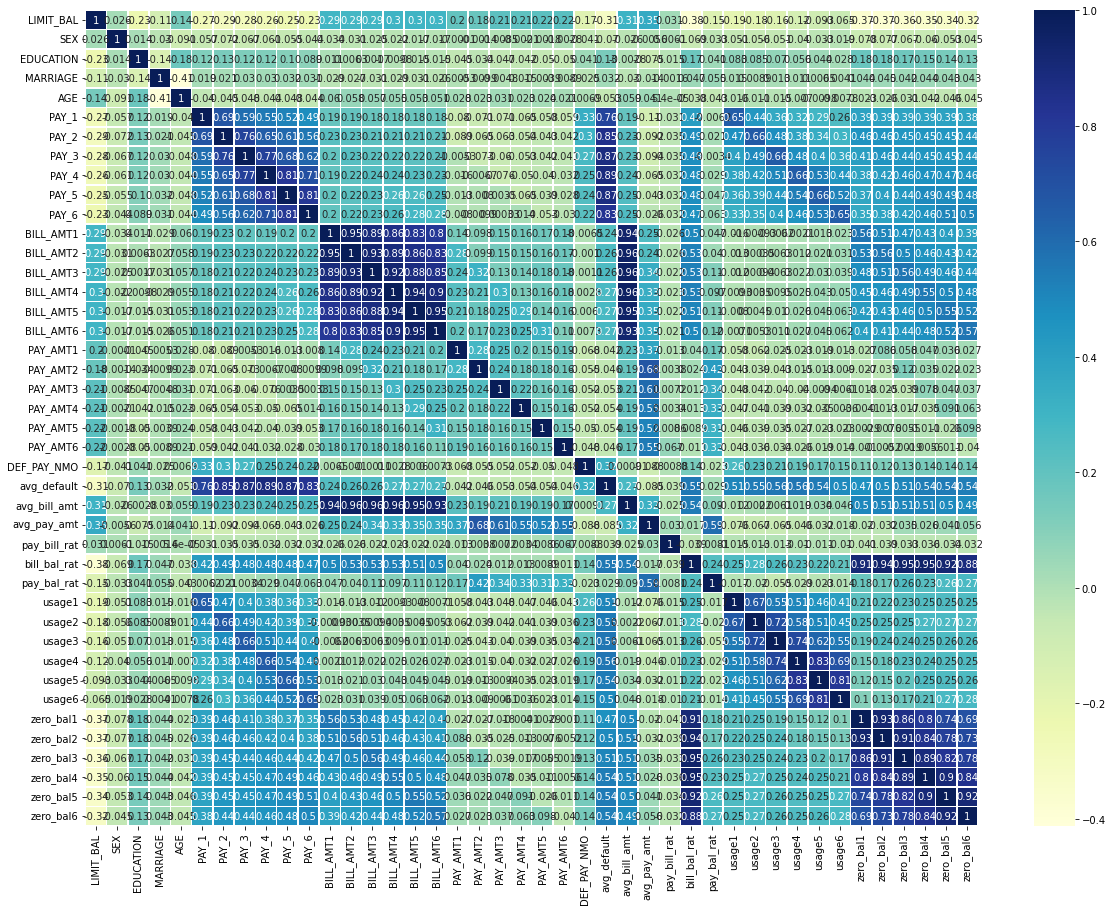

In [ ]:
plt.figure(figsize=(20,15))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=.5)
  
# displaying heatmap
plt.show()

In [ ]:
best_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO',   'avg_pay_amt',
       'pay_bill_rat',  'pay_bal_rat', 'usage1', 'usage2',
       'zero_bal2','zero_bal5'
       ]

In [ ]:
test = df[best_features]

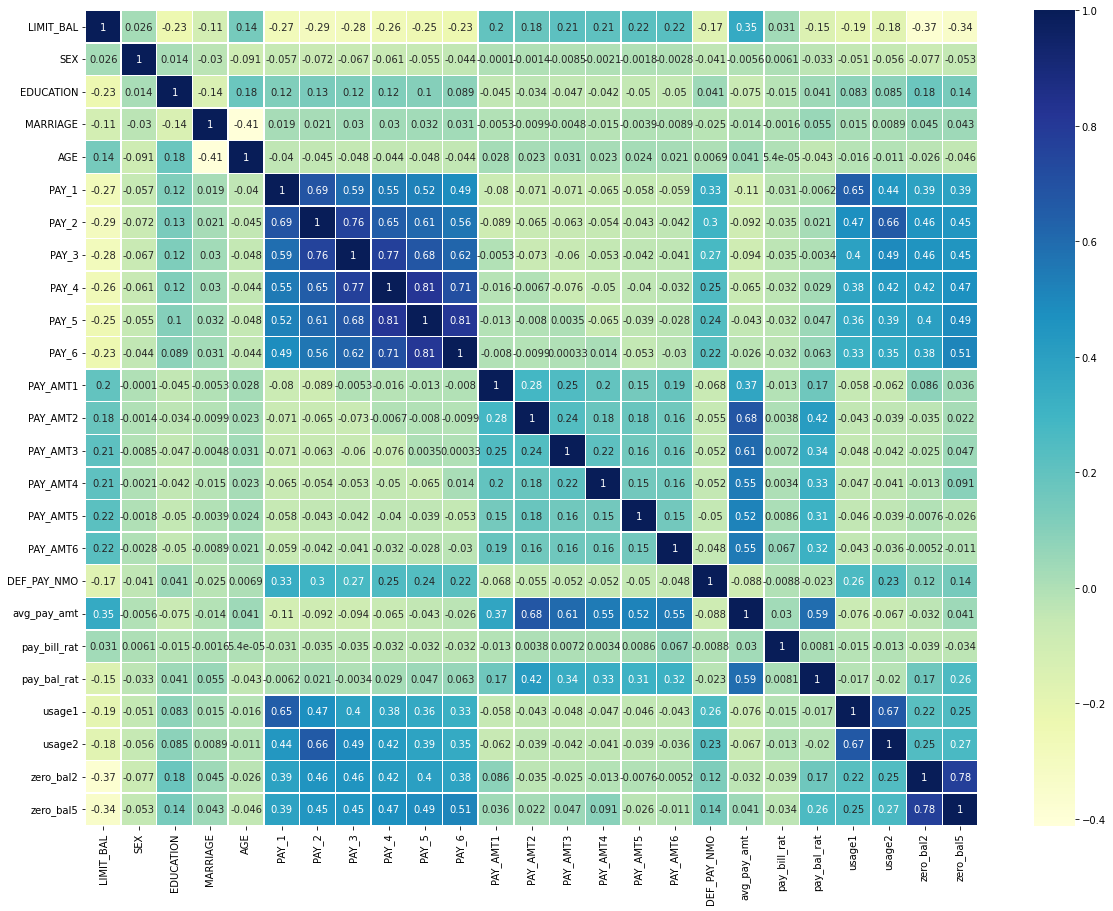

In [ ]:
plt.figure(figsize=(20,15))
dataplot = sb.heatmap(test.corr(), cmap="YlGnBu", annot=True,linewidths=.5)
  
# displaying heatmap
plt.show()

In [ ]:
X1 = df.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X3 = df[best_features]
# Get variables for which to compute VIF and add intercept term
X3['intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

vif.sort_values(by='VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
13,PAY_AMT3,inf
12,PAY_AMT2,inf
18,avg_pay_amt,inf
17,DEF_PAY_NMO,inf
16,PAY_AMT6,inf
15,PAY_AMT5,inf
14,PAY_AMT4,inf
25,intercept,68.951131
6,PAY_2,4.567924
9,PAY_5,4.393777


In [ ]:
df = df.drop(df[df['pay_bill_rat']==0].index)

In [ ]:
df = df.drop(df[df['pay_bill_rat'].isnull()].index)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO', 'avg_default', 'avg_bill_amt', 'avg_pay_amt',
       'pay_bill_rat', 'bill_bal_rat', 'pay_bal_rat', 'usage1', 'usage2',
       'usage3', 'usage4', 'usage5', 'usage6', 'zero_bal1', 'zero_bal2',
       'zero_bal3', 'zero_bal4', 'zero_bal5', 'zero_bal6'],
      dtype='object')

In [ ]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res


In [ ]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'DEF_PAY_NMO')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO', 'SE_MA_2'],
      dtype='object')

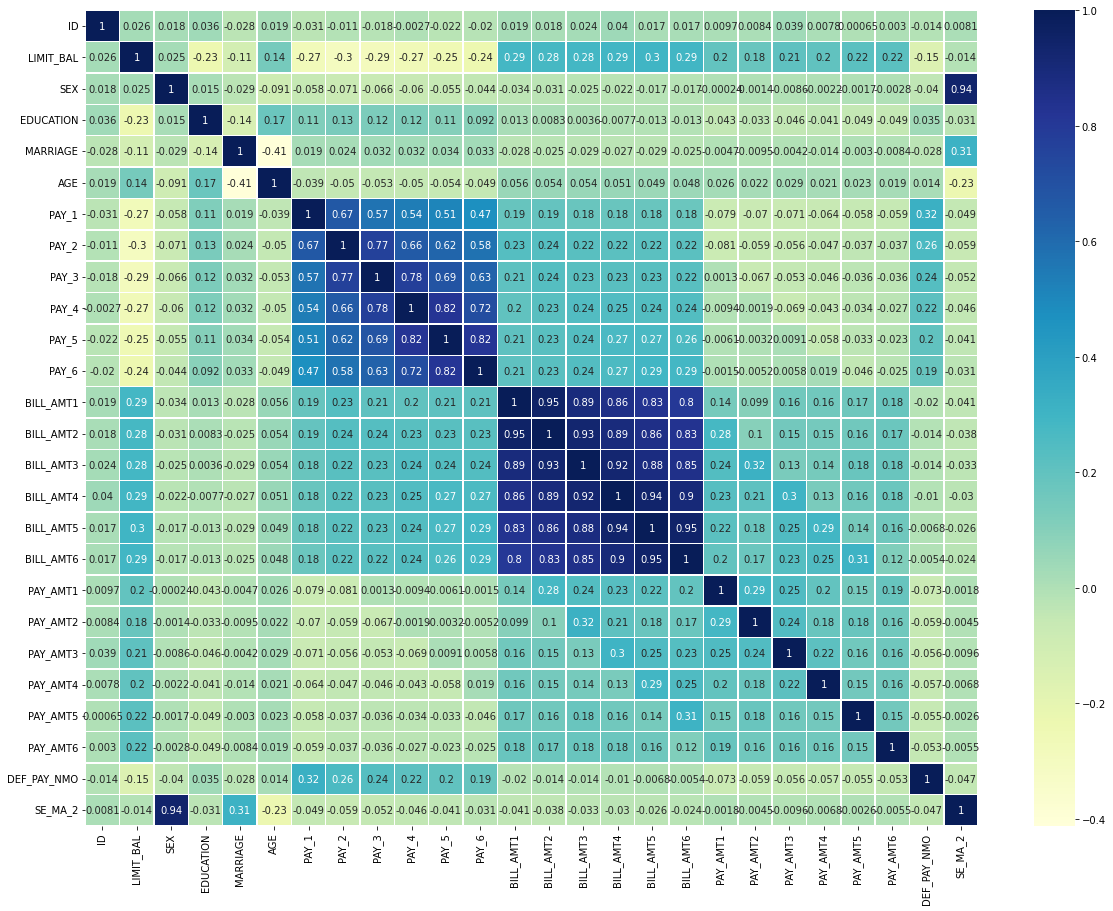

In [ ]:
plt.figure(figsize=(20,15))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=.5)
  
# displaying heatmap
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df,.7)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'SE_MA_2'}

In [ ]:
df1 = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO']]

In [ ]:
df2 = df[best_features]

In [ ]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY_NMO', 'avg_pay_amt',
       'pay_bill_rat', 'pay_bal_rat', 'usage1', 'usage2', 'zero_bal2',
       'zero_bal5'],
      dtype='object')

In [ ]:
df1 # without corelated fearures

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
0,1,20000.0,2,2,1,24,2,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,1683.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


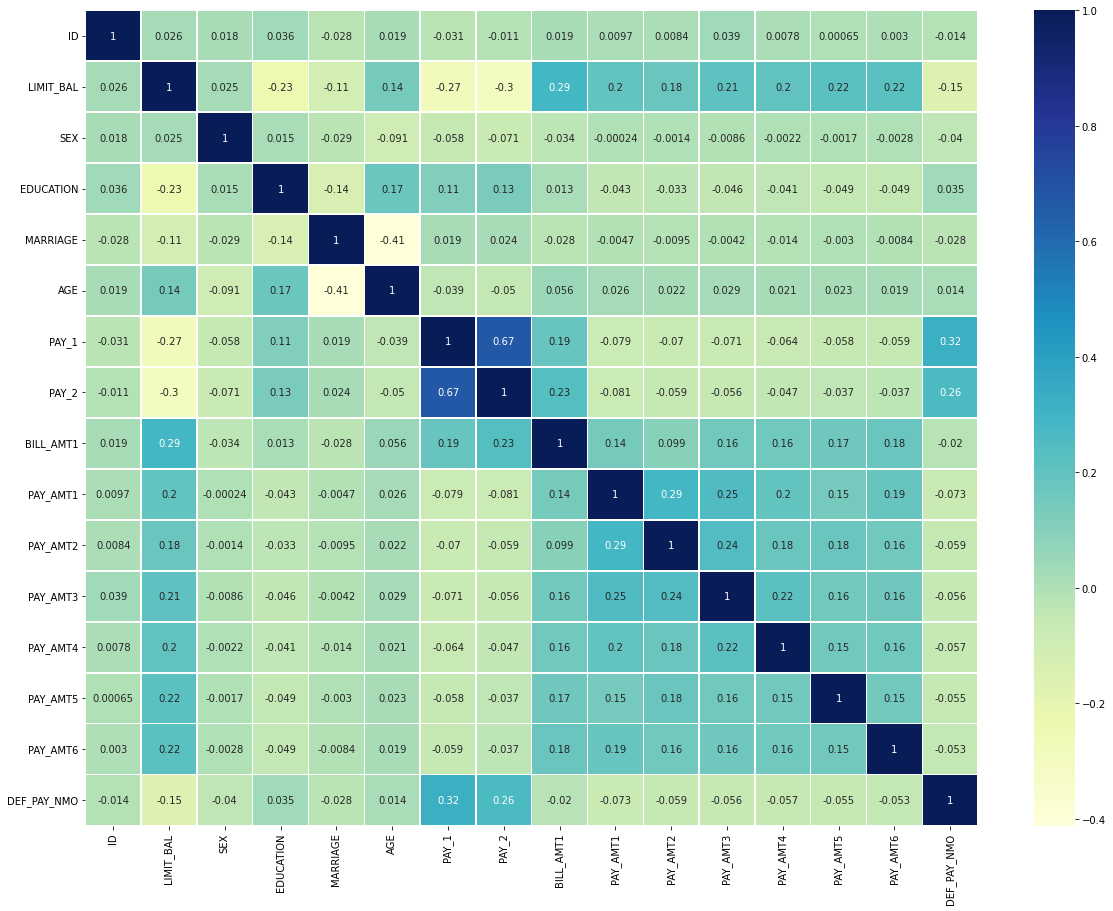

In [ ]:
plt.figure(figsize=(20,15))
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True,linewidths=.5)
  
# displaying heatmap
plt.show()

In [ ]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features1 = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


y = df['DEF_PAY_NMO'].copy() # target
X = df[features].copy()
X1 = df[features1].copy()

In [ ]:
best_feat =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_pay_amt',
       'pay_bill_rat', 'pay_bal_rat', 'usage1', 'usage2', 'zero_bal2',
       'zero_bal5']
y = df['DEF_PAY_NMO'].copy() # target
X = df[best_feat].copy()



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN  

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
def Scale_Split_Balance(df, features, target='DEF_PAY_NMO', scaled=False, balanced=False, test_size=0.2, random_state=10):
    '''
    This function takes in a dataframe, the feature variables, the target variables
    and then splits the data with the user having the option to scale and balance the data
    and set values for the split proportion and the random seed.
    '''
    # Resampling methods
    random_us = RandomUnderSampler() # undersampling
    random_os = RandomOverSampler() # oversampling
    smote = SMOTE() # smote
    adasyn = ADASYN() # Adaptive synthetic
    smotetomek = SMOTETomek(0.7) # smote + tomek
    smoteenn = SMOTEENN() # smote + enn

    X, y = df[features], df[target]

    # Checking if X needs to be scaled
    if scaled == True:
        X_sc = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    else:
        X_sc = X
    
    # Executing sklearn's train-test split
    X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=test_size, stratify=y, random_state=random_state)
    
    # Checking if training data needs to be balanced
    if balanced == 'random_os':
        X_sc_train_rs, y_sc_train_rs = random_os.fit_resample(X_sc_train, y_train)
    elif balanced == 'random_us':
        X_sc_train_rs, y_sc_train_rs = random_us.fit_resample(X_sc_train, y_train)
    elif balanced == 'smote':
        X_sc_train_rs, y_sc_train_rs = smote.fit_resample(X_sc_train, y_train)
    elif balanced == 'adasyn':
        X_sc_train_rs, y_sc_train_rs = adasyn.fit_resample(X_sc_train, y_train)
    elif balanced == 'smotetomek':
        X_sc_train_rs, y_sc_train_rs = smotetomek.fit_resample(X_sc_train, y_train)
    elif balanced == 'smoteenn':
        X_sc_train_rs, y_sc_train_rs = smoteenn.fit_resample(X_sc_train, y_train)
    else:
        X_sc_train_rs, y_sc_train_rs = X_sc_train, y_train        
        
    return X_sc_train_rs, X_sc_test, y_sc_train_rs, y_test



In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
clf_lr = LogisticRegression(max_iter = 1200000)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced='smotetomek')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.7482810962779767


[[4094  468]
 [ 650  614]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4562
           1       0.57      0.49      0.52      1264

    accuracy                           0.81      5826
   macro avg       0.72      0.69      0.70      5826
weighted avg       0.80      0.81      0.80      5826



NameError: ignored

In [ ]:
y_train.value_counts()

0    17858
1    17858
Name: DEF_PAY_NMO, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced='random_us')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.732346495519117


[[3367 1195]
 [ 473  791]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      4562
           1       0.40      0.63      0.49      1264

    accuracy                           0.71      5826
   macro avg       0.64      0.68      0.64      5826
weighted avg       0.77      0.71      0.73      5826



In [ ]:
y_train.value_counts()

0    5309
1    5309
Name: DEF_PAY_NMO, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='smoteenn')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8305392328423714


[[2757 1916]
 [ 369  958]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71      4673
           1       0.33      0.72      0.46      1327

    accuracy                           0.62      6000
   macro avg       0.61      0.66      0.58      6000
weighted avg       0.76      0.62      0.65      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features1,target='DEF_PAY_NMO',scaled=True,balanced='smoteenn')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8269676476903944


[[2736 1937]
 [ 362  965]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.70      4673
           1       0.33      0.73      0.46      1327

    accuracy                           0.62      6000
   macro avg       0.61      0.66      0.58      6000
weighted avg       0.76      0.62      0.65      6000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=False,balanced="smoteenn")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.9691765345307124


[[3603  959]
 [ 471  793]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4562
           1       0.45      0.63      0.53      1264

    accuracy                           0.75      5826
   macro avg       0.67      0.71      0.68      5826
weighted avg       0.79      0.75      0.77      5826



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=False,balanced="smoteenn")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.9698848948600188


[[3641  921]
 [ 473  791]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4562
           1       0.46      0.63      0.53      1264

    accuracy                           0.76      5826
   macro avg       0.67      0.71      0.69      5826
weighted avg       0.79      0.76      0.77      5826



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="smotetomek")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
predictions_train = clf_rf.predict(X_train)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9288297216801891


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18195
           1       0.99      1.00      1.00     18195

    accuracy                           1.00     36390
   macro avg       1.00      1.00      1.00     36390
weighted avg       1.00      1.00      1.00     36390

[[4057  616]
 [ 688  639]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4673
           1       0.51      0.48      0.49      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [ ]:
param_grid = {
    'max_depth': [50,60,110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12,14,16],
    'n_estimators': [100, 200,300]
}

grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 135 candidates, totalling 405 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
best_params_ = {'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf_best = RandomForestClassifier(**best_params_)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=False,balanced="smoteenn")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.9615424248990756


[[3475  944]
 [ 454  810]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4419
           1       0.46      0.64      0.54      1264

    accuracy                           0.75      5683
   macro avg       0.67      0.71      0.68      5683
weighted avg       0.79      0.75      0.77      5683



Text(0.5, 1.0, 'Features importance')

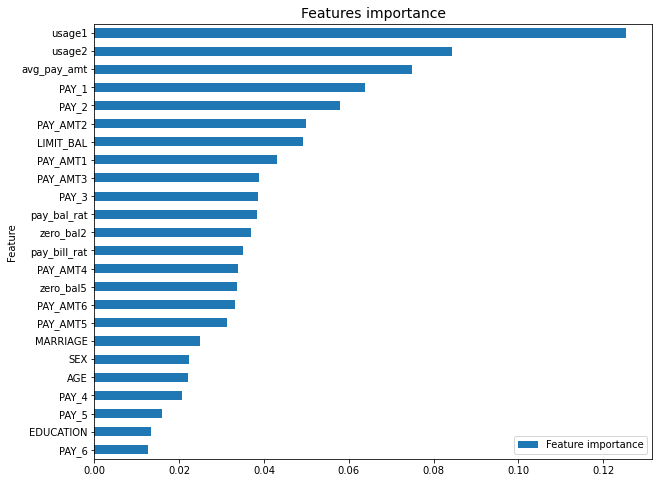

In [ ]:
fea_df = pd.DataFrame({'Feature': best_feat, 'Feature importance': rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="smotetomek")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

ROC_AUC -  0.9200900317129289


[[4020  653]
 [ 644  683]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.51      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features1,target='DEF_PAY_NMO',scaled=False,balanced="smotetomek")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

ROC_AUC -  0.9030810873917785


[[3927  746]
 [ 615  712]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4673
           1       0.49      0.54      0.51      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="random_us")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

ROC_AUC -  0.7738822728260358


[[3610 1063]
 [ 485  842]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4673
           1       0.44      0.63      0.52      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.76      6000



In [ ]:
smotetomek

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="smotetomek")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.899504341250633


[[4175  498]
 [ 702  625]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.56      0.47      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=False,balanced="smotetomek")
clf_svc.fit(X_train,y_train)
predictions = clf_svc.predict(X_test)
scores = cross_val_score(clf_svc, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.6771260102991787


[[3625 1048]
 [ 807  520]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4673
           1       0.33      0.39      0.36      1327

    accuracy                           0.69      6000
   macro avg       0.57      0.58      0.58      6000
weighted avg       0.71      0.69      0.70      6000



In [ ]:
X_train,x_test,y_train,y_test = Scale_Split_Balance(df, features, target='DEF_PAY_NMO', scaled=True, balanced=False, test_size=0.2, random_state=10)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid_search = GridSearchCV(estimator = clf_svc, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
best_params_ = {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
best_svc = SVC(**best_params_)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced="smotetomek")
best_svc.fit(X_train,y_train)
predictions = best_svc.predict(X_test)
scores = cross_val_score(best_svc, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smoteenn")
best_svc.fit(X_train,y_train)
predictions = best_svc.predict(X_test)
scores = cross_val_score(best_svc, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.885093790353948


[[3701  972]
 [ 507  820]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4673
           1       0.46      0.62      0.53      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.75      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="random_us")
best_svc.fit(X_train,y_train)
predictions = best_svc.predict(X_test)
scores = cross_val_score(best_svc, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.7504111996487135


[[3806  867]
 [ 535  792]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.60      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced="random_us")
clf_gnb.fit(X_train,y_train)
predictions = clf_gnb.predict(X_test)
scores = cross_val_score(clf_gnb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

ROC_AUC -  0.7397219504559153


[[2061 2358]
 [ 273  991]]
              precision    recall  f1-score   support

           0       0.88      0.47      0.61      4419
           1       0.30      0.78      0.43      1264

    accuracy                           0.54      5683
   macro avg       0.59      0.63      0.52      5683
weighted avg       0.75      0.54      0.57      5683



/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smotetomek")
clf_gnb.fit(X_train,y_train)
predictions = clf_gnb.predict(X_test)
scores = cross_val_score(clf_gnb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.7506302355244217


[[1480 3193]
 [ 191 1136]]
              precision    recall  f1-score   support

           0       0.89      0.32      0.47      4673
           1       0.26      0.86      0.40      1327

    accuracy                           0.44      6000
   macro avg       0.57      0.59      0.43      6000
weighted avg       0.75      0.44      0.45      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smoteenn")
clf_gnb.fit(X_train,y_train)
predictions = clf_gnb.predict(X_test)
scores = cross_val_score(clf_gnb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.8358395263919702


[[1237 3436]
 [ 158 1169]]
              precision    recall  f1-score   support

           0       0.89      0.26      0.41      4673
           1       0.25      0.88      0.39      1327

    accuracy                           0.40      6000
   macro avg       0.57      0.57      0.40      6000
weighted avg       0.75      0.40      0.40      6000



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=clf_gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


In [ ]:
Data_transformed = PowerTransformer().fit_transform(X_test)

In [ ]:
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [ ]:
best_gnb = GaussianNB(**{'var_smoothing': 0.657933224657568})

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smoteenn")
best_gnb.fit(X_train,y_train)
predictions = best_gnb.predict(X_test)
scores = cross_val_score(best_gnb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.8156832863430491


[[4034  639]
 [ 679  648]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.50      0.49      0.50      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smotetomek")
best_gnb.fit(X_train,y_train)
predictions = best_gnb.predict(X_test)
scores = cross_val_score(best_gnb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.7176024482351198


[[4413  260]
 [ 917  410]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.61      0.31      0.41      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_best = XGBClassifier(**{'subsample': 0.6,
 'scale_pos_weight': 1,
 'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5})

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=False,balanced='smoteenn')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC -  0.9516883803461426


[[3499  920]
 [ 440  824]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4419
           1       0.47      0.65      0.55      1264

    accuracy                           0.76      5683
   macro avg       0.68      0.72      0.69      5683
weighted avg       0.80      0.76      0.77      5683



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced='smoteenn')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Training - ",scores)
print('\n')



print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC Training -  0.96246944612717


[[3671  748]
 [ 495  769]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      4419
           1       0.51      0.61      0.55      1264

    accuracy                           0.78      5683
   macro avg       0.69      0.72      0.70      5683
weighted avg       0.80      0.78      0.79      5683



ROC_AUC  -  0.779683217926783
/n


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


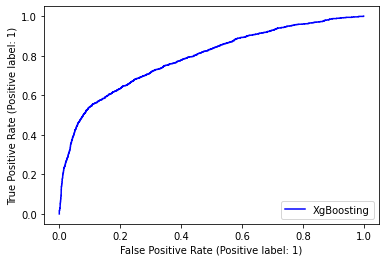

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

scores = cross_val_score(xgb_best, X_test, y_test, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC  - ",scores)
print('/n')
plot_roc_curve(xgb_best, X_test, y_test,color="blue",label='XgBoosting')

Text(0.5, 1.0, 'Features importance')

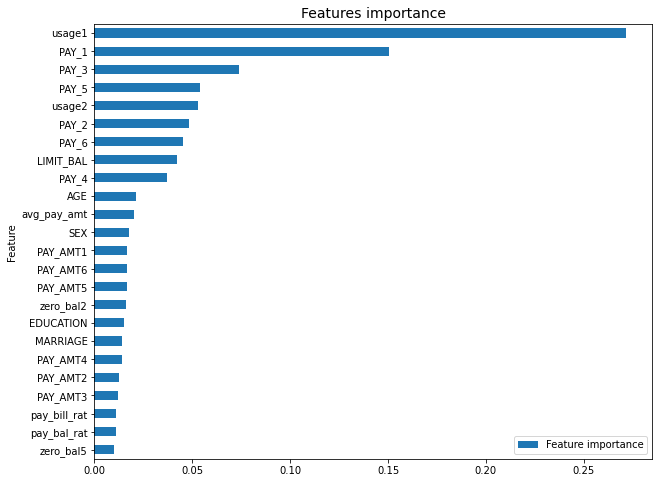

In [ ]:
fea_df = pd.DataFrame({'Feature': best_feat, 'Feature importance': xgb_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='smotetomek')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Training - ",scores)
print('\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('\n')
scores = cross_val_score(xgb_best, X_test, y_test, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Training - ",scores)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC Training -  0.8830617138988301


[[4241  432]
 [ 721  606]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.46      0.51      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.70      6000
weighted avg       0.79      0.81      0.80      6000



ROC_AUC Training -  0.7689109461734278


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
adaa_best = AdaBoostClassifier(**{'learning_rate': 0.5, 'n_estimators': 200})

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced='smotetomek')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Training - ",scores)
print('\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('\n')
scores = cross_val_score(xgb_best, X_test, y_test, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Testing - ",scores)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC Training -  0.8387539898585068


[[4075  344]
 [ 643  621]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4419
           1       0.64      0.49      0.56      1264

    accuracy                           0.83      5683
   macro avg       0.75      0.71      0.72      5683
weighted avg       0.81      0.83      0.82      5683



ROC_AUC Testing -  0.779683217926783


In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,best_feat,target='DEF_PAY_NMO',scaled=True,balanced='smoteenn')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Training - ",scores)
print('\n')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('\n')
scores = cross_val_score(xgb_best, X_test, y_test, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Testing - ",scores)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ROC_AUC Training -  0.925742394705724


[[3443  976]
 [ 431  833]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4419
           1       0.46      0.66      0.54      1264

    accuracy                           0.75      5683
   macro avg       0.67      0.72      0.69      5683
weighted avg       0.79      0.75      0.77      5683



ROC_AUC Testing -  0.779683217926783


Text(0.5, 1.0, 'Features importance')

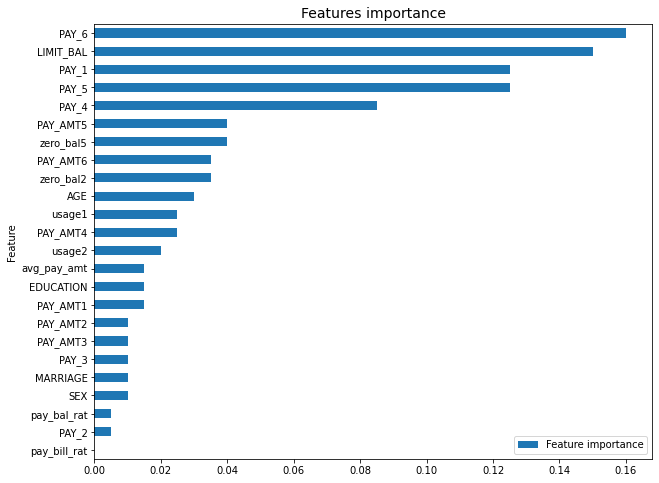

In [ ]:
fea_df = pd.DataFrame({'Feature': best_feat, 'Feature importance': adaa_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('clf_lr',clf_lr),
    ('xgb_best',xgb_best),
    ('adaa_best',adaa_best),
    ('rf_best',rf_best),
    ('best_svc',best_svc),
    ('best_gnb',best_gnb)
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)



NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='smoteenn')

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[3630 1043]
 [ 499  828]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      4673
           1       0.44      0.62      0.52      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.76      6000



In [ ]:
scores = cross_val_score(stack_model, X_test, y_test, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC Testing - ",scores)

ROC_AUC Testing -  0.7749106252909927


# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section